<Figure size 1000x600 with 0 Axes>

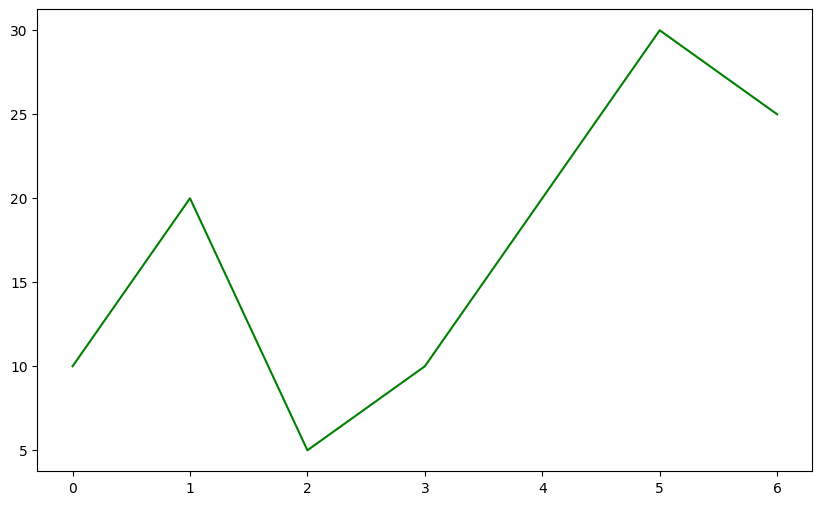

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

plt.figure(figsize=(10,6))

t = [0, 1, 2, 3, 4, 5, 6]
y = [10, 20, 5, 10, 20, 30, 25]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')

plt.show()

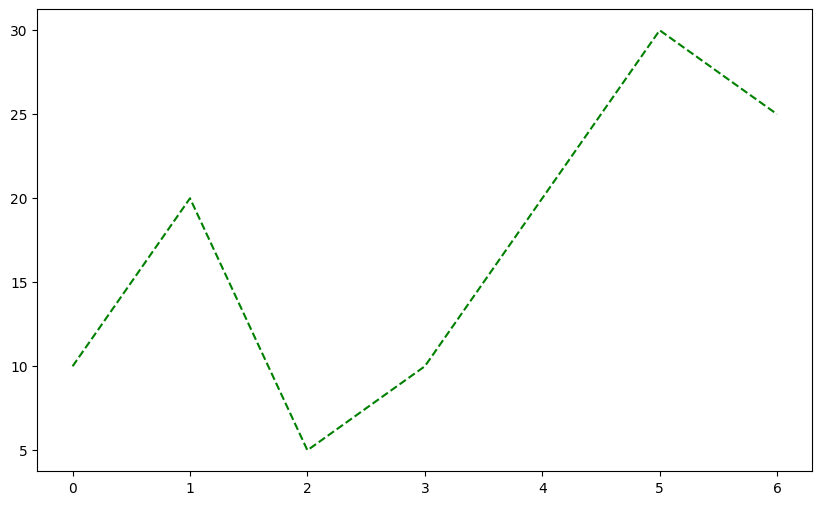

In [2]:
#linestyle을 dashed로 지정한 경우 
plt.figure(figsize=(10,6))

plt.plot(t, y, color='green', linestyle='dashed')

plt.show()

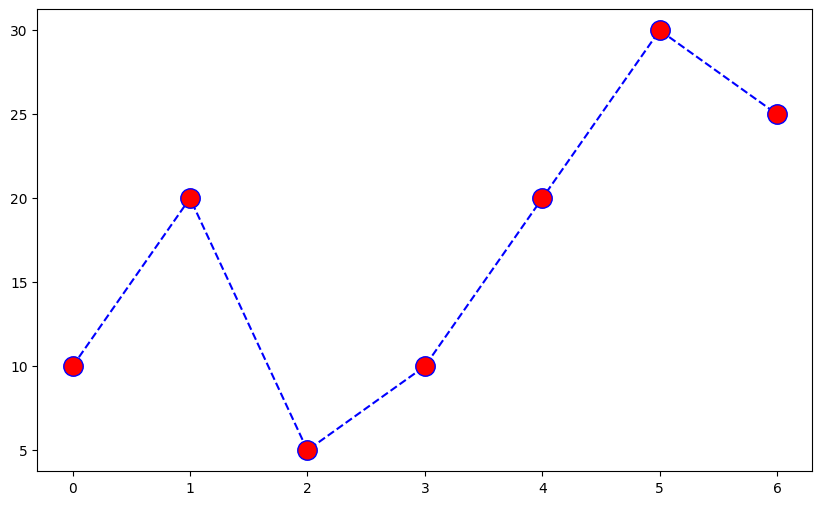

In [3]:
#이번에는 marker를 'o'로 지정하고 색깔과 크기를 지정한 경우 
plt.figure(figsize=(10,6))

plt.plot(t, y, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=14)

plt.show()

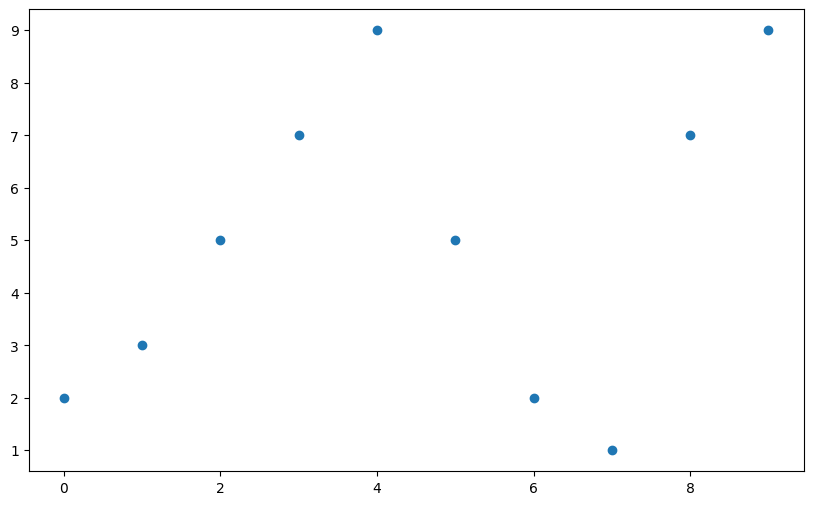

In [4]:
#시간축(t)과 데이터축(y)을 생성해서 산포도로 출력 
t = np.array([0,1,2,3,4,5,6,7,8,9])

y = np.array([2,3,5,7,9,5,2,1,7,9])

plt.figure(figsize=(10,6))

plt.scatter(t,y)

plt.show()

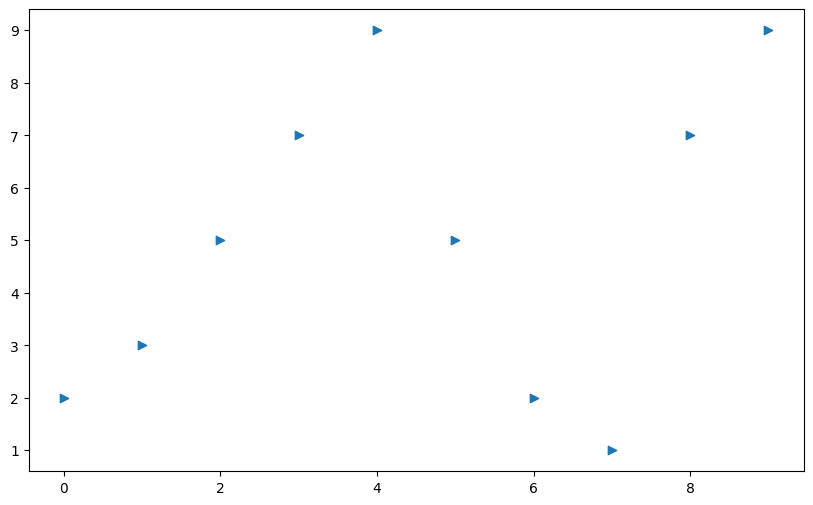

In [5]:
#이번에는 marker를 '>'로 지정 
plt.figure(figsize=(10,6))

plt.scatter(t, y, marker='>')

plt.show()

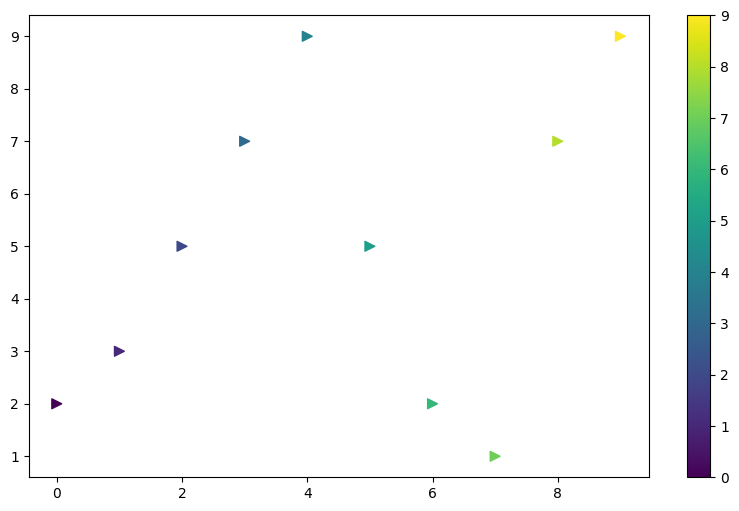

In [6]:
#이번에는 컬러맵을 생성 
colormap = t 

plt.figure(figsize=(10,6))

plt.scatter(t, y, s=50, c=colormap, marker='>')

plt.colorbar()

plt.show()

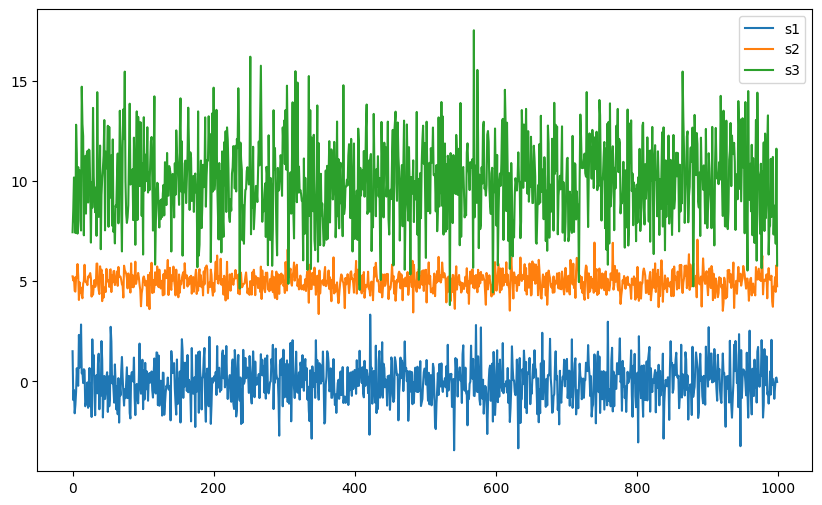

In [7]:
#랜덤값을 3개 만들고 스캐일을 1, 0.5, 2로 주고 파장을 출력 
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))

plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')

plt.legend()

plt.show()

In [8]:
#한글처리에 필요한 코드 rc 셋팅을 미리 변경 
import platform

from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

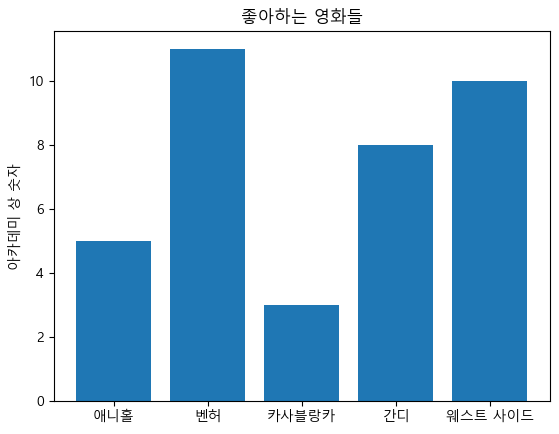

In [9]:
#영화 데이터로 막대 그래프 출력 
movies = ["애니홀", "벤허", "카사블랑카", "간디", "웨스트 사이드"]

num_oscars = [5, 11, 3, 8, 10]

plt.bar(movies, num_oscars)

plt.ylabel("아카데미 상 숫자")
plt.title("좋아하는 영화들")
plt.show()

In [15]:
#엑셀 파일 읽기
import pandas as pd 
dfExcel = pd.read_excel('c:\\work\\demo.xlsx', 'Sheet1')

dfExcel

,사번,성별,나이,판매금액,수입
0,E001,M,34,123,350
1,E002,F,40,114,450
2,E003,F,37,135,169
3,E004,M,30,139,189
4,E005,F,44,117,183
5,E006,M,36,121,90
6,E007,M,32,133,166
7,E008,F,26,140,120
8,E009,M,32,133,75
9,E010,M,36,133,40


<AxesSubplot: title={'center': '남녀별 판매금액 합계'}, xlabel='성별', ylabel='판매금액 합계'>

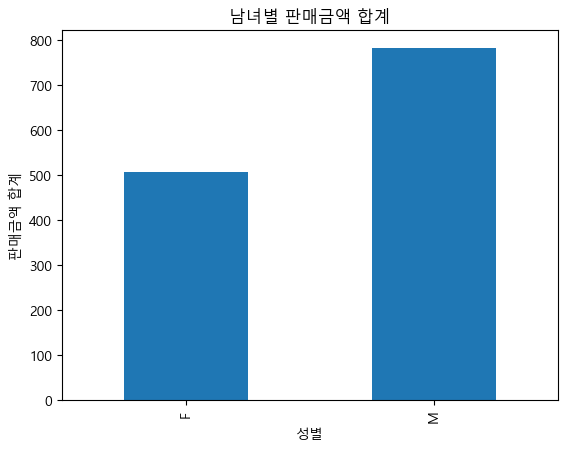

In [16]:
#남녀별 판매금액 합계 
var = dfExcel.groupby('성별').판매금액.sum()

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel('성별')

ax1.set_ylabel('판매금액 합계')

ax1.set_title('남녀별 판매금액 합계')

var.plot(kind='bar')

Text(0.5,0,'단계')

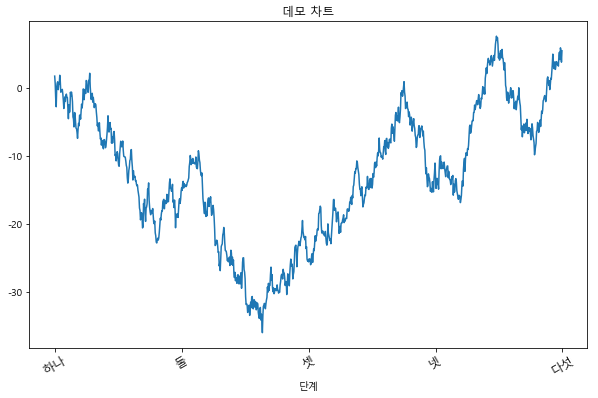

In [ ]:
#눈금과 눈금간격, 범례를 지정하기 
%matplotlib inline
import numpy as np 

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['하나', '둘', '셋', '넷', '다섯'], rotation=30, fontsize='large')

ax.set_title('데모 차트')

ax.set_xlabel('단계')

In [26]:
#groupby()메서드 사용 
from pandas import Series, DataFrame

df = DataFrame({'key1':['a','a','b','b','a'], 
                'key2':['one','two','one','two','one'], 
                'data1':np.random.randn(5), 
                'data2':np.random.randn(5)})

df

grouped = df.groupby("key1")["data1"]

grouped


In [27]:
print( grouped.mean() )

print( grouped.sum() )

print( grouped.count() )

key1
a    1.198385
b   -0.248144
Name: data1, dtype: float64
key1
a    3.595156
b   -0.496289
Name: data1, dtype: float64
key1
a    3
b    2
Name: data1, dtype: int64


In [29]:
means = df.groupby( ["key1","key2"] )["data1"].mean()

means

key1  key2
a     one     1.650087
      two     0.294982
b     one    -0.376779
      two    -0.119510
Name: data1, dtype: float64

In [31]:
# concat 함수는 기본적으로 같은 컬럼 레이블을 갖는 
# 데이터프레임 객체를 위/아래로 연결합니다. 
# axis=1 파라미터를 전달하면 리스트로 전달된 데이터프레임을 
# 좌/우로 연결합니다. 
# 이때 데이터프레임들은 인덱스를 기준으로 데이터를 연결합니다.
from pandas import DataFrame 
import pandas as pd 
#첫번째 데이터프레임
data = { 
        '종가':[113000,111500],
        '거래량':[555850, 282163]
        }
index = ['2019-06-21','2019-06-20']
df1 = DataFrame(data=data, index=index)
#두번째
data = { 
        '시가':[112500,111000],
        '고가':[115000, 112000],
        '저가':[111500, 109000]
        }
index = ['2019-06-21','2019-06-20']
df2 = DataFrame(data=data, index=index)

In [32]:
df = pd.concat([df1, df2], axis=1)
#좌우로 붙이기 
df


,종가,거래량,시가,고가,저가
2019-06-21,113000,555850,112500,115000,111500
2019-06-20,111500,282163,111000,112000,109000


In [34]:
#컬럼을 순서를 변경해 봅니다.
print("---정렬순서를 변경---")
정렬순서 = ['시가','고가','저가','종가','거래량']
df = df[정렬순서]
df

---정렬순서를 변경---


,시가,고가,저가,종가,거래량
2019-06-21,112500,115000,111500,113000,555850
2019-06-20,111000,112000,109000,111500,282163


In [37]:
#위/아래로 붙이기 
# 이번에는 데이터프레임을 위/아래로 이어 붙여 보겠습니다. 
# 두 개의 데이터프레임의 컬럼을 기준으로 정렬한 후 위/아래로 붙여서 
# 새로운 데이터프레임을 생성할 수 있습니다. 
from pandas import DataFrame
import pandas as pd

# 첫 번째 데이터프레임
data = {
    '종가': [113000, 111500],
    '거래량': [555850, 282163]
}
index = ["2019-06-21", "2019-06-20"]
df1 = DataFrame(data, index=index)

# 두 번째 데이터프레임
data = {
    '종가': [110000, 483689],
    '거래량': [109000, 791946]
}
index = ["2019-06-19", "2019-06-18"]
df2 = DataFrame(data, index=index)

print( df1 )
print( df2 )

                종가     거래량
2019-06-21  113000  555850
2019-06-20  111500  282163
                종가     거래량
2019-06-19  110000  109000
2019-06-18  483689  791946


In [38]:
print("---위아래 붙이기---")
df = df1.append(df2)
df

---위아래 붙이기---


C:\Users\USER\AppData\Local\Temp\ipykernel_32192\3198215908.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,종가,거래량
2019-06-21,113000,555850
2019-06-20,111500,282163
2019-06-19,110000,109000
2019-06-18,483689,791946


In [40]:
# 데이터프레임이 여러 개인 경우 concat 함수를 사용하면 편리합니다.
print("---concat함수로 위아래 붙이기---")
df = pd.concat([df1, df2])
df


---concat함수로 위아래 붙이기---


,종가,거래량
2019-06-21,113000,555850
2019-06-20,111500,282163
2019-06-19,110000,109000
2019-06-18,483689,791946


In [42]:
#Merge
# 판다스의 merge는 데이터프레임을 '병합'합니다. 
# concat이 단순히 두 데이터프레임을 이어 붙이는 연결이라면 
# merge는 특정 컬럼의 값을 기준으로 데이터를 병합합니다. 
from pandas import DataFrame
import pandas as pd

# 첫 번째 데이터프레임
data = [
    ["전기전자", "005930", "삼성전자", 74400],
    ["화학", "051910", "LG화학", 896000],
    ["전기전자", "000660", "SK하이닉스", 101500]
]

columns = ["업종", "종목코드", "종목명", "현재가"]
df1 = DataFrame(data=data, columns=columns)

# 두 번째 데이터프레임
data = [
    ["은행", 2.92],
    ["보험", 0.37],
    ["화학", 0.06],
    ["전기전자", -2.43]
]

columns = ["업종","등락률"]
df2 = DataFrame(data=data, columns=columns)

print( df1 )
print( df2 )

     업종    종목코드     종목명     현재가
0  전기전자  005930    삼성전자   74400
1    화학  051910    LG화학  896000
2  전기전자  000660  SK하이닉스  101500
     업종   등락률
0    은행  2.92
1    보험  0.37
2    화학  0.06
3  전기전자 -2.43


In [ ]:
print("---merge함수로 붙이기---")
df = pd.merge(left=df1, right=df2, on='업종')
print(df)

# how 파라미터를 사용해서 합치는 방법을 지정할 수 있습니다. 
# 'inner' 모드를 사용하면 df1과 df2의 교집합, 
# 'outer' 모드를 사용하면 합집합으로 병합됩니다. 
# 모드에 따른 동작은 concat에서 사용해 본 것처럼 일관성 있게 
# 설계돼 있습니다. 
# 추가로 merge에서 사용할 수 있는 left, right 옵션에 
# 대해 알아봅시다. 추가 옵션에 사용할 데이터를 우선 정의합니다. 
# 이전 코드에서 df1의 데이터만 일부 변경했습니다.
# 첫 번째 데이터프레임
data = [
    ["전기전자", "005930", "삼성전자", 74400],
    ["화학", "051910", "LG화학", 896000],
    ["서비스업", "035720", "카카오", 121500]
]

columns = ["업종", "종목코드", "종목명", "현재가"]
df1 = DataFrame(data=data, columns=columns)

# 두 번째 데이터프레임
data = [
    ["은행", 2.92],
    ["보험", 0.37],
    ["화학", 0.06],
    ["전기전자", -2.43]
]

columns = ["업종", "등락률"]
df2 = DataFrame(data=data, columns=columns)

# 두 데이터프레임을 병합할 때 left 옵션을 사용해 보겠습니다. 
# 이는 left 파라미터에 입력된 데이터프레임 df1을 기준으로 
# 두 데이터프레임을 병합합니다.
print("---merge함수에서 how=left지정하기---")
df = pd.merge(left=df1, right=df2, 
    how='left', on='업종')
print(df)


# 만약 두 데이터프레임의 컬럼이 다르다면 어떻게 해야 할까요? 
# 물론 컬럼의 이름을 변경하고 데이터프레임을 합칠 수 있지만, 
# 코드의 양만 많아집니다. 
# 다음 예제와 함께 merge의 옵션을 사용해서 한 번에 문제를 해결해 봅시다. 
# 이전 코드에서 두 번째 데이터프레임의 컬럼 이름만을 다르게 정의했습니다.
# 첫 번째 데이터프레임
data = [
    ["전기전자", "005930", "삼성전자", 74400],
    ["화학", "051910", "LG화학", 896000],
    ["서비스업", "035720", "카카오", 121500]
]

columns = ["업종", "종목코드", "종목명", "현재가"]
df1 = DataFrame(data=data, columns=columns)

# 두 번째 데이터프레임
data = [
    ["은행", 2.92],
    ["보험", 0.37],
    ["화학", 0.06],
    ["전기전자", -2.43]
]

columns = ["항목", "등락률"]
df2 = DataFrame(data=data, columns=columns)


# 두 데이터프레임의 컬럼 이름이 다르기 때문에 합칠 기준이되는 각 컬럼의 이름을 
# 모두 입력해야 합니다. 
# left_on와 right_on 파라미터에 두 컬럼 이름을 넣습니다.
print("---기준이 되는 컬럼명이 다른 경우---")
df = pd.merge(left=df1, 
    right=df2, left_on='업종',
    right_on='항목')
print(df)

